# Load data

In [136]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv("housing.csv")

# Explore data 

In [137]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [139]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(*args, **kw)>

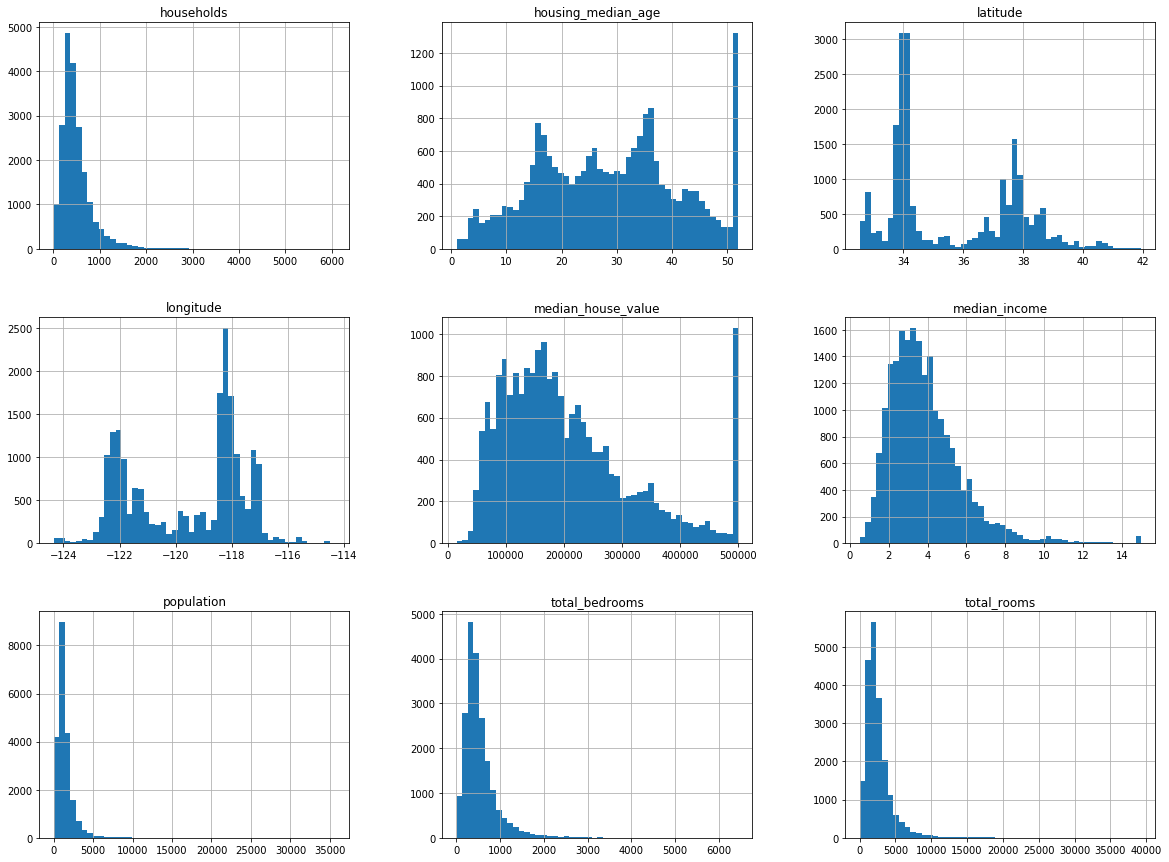

In [141]:
df.hist(bins=50 , figsize=(20,15))
plt.show

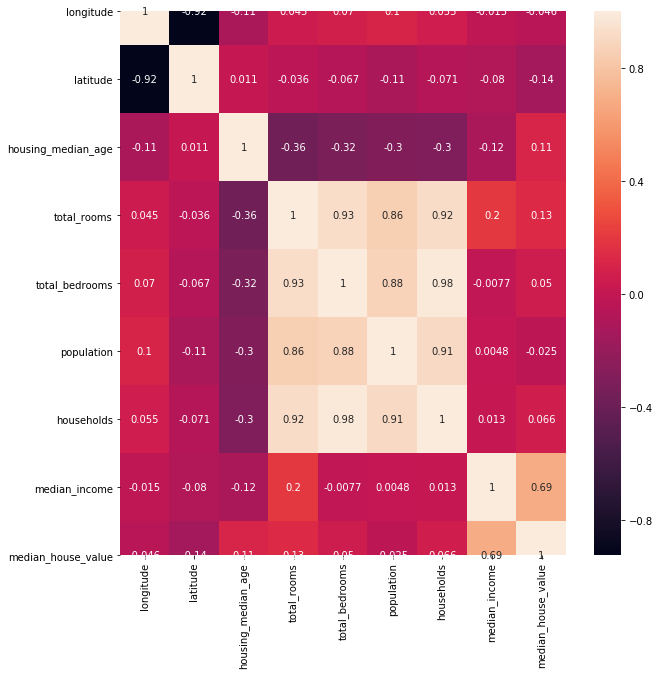

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

# Data cleaning

In [77]:
df[df["total_bedrooms"].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [78]:
# fill NAN values with the median
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median,inplace=True)

In [92]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [103]:
df["ocean_proximity"].replace({ "<1H OCEAN" :1 , "INLAND" : 2 ,"NEAR OCEAN" :3 ,"NEAR BAY":4 , "ISLAND" : 5 },inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# train and test split 

In [104]:
train,test = train_test_split(df,test_size=0.20,random_state=42)

In [105]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,2
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,2
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,2
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,1


In [106]:
Xtrain = train.drop("median_house_value",axis =1 )
Xtrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,2
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,2
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,2
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1


In [107]:
Ytrain = train.median_house_value
Ytrain

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [108]:
from sklearn.linear_model import LinearRegression
hypothesis = LinearRegression()

In [109]:
hypothesis.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
model.score(x_test,test.median_house_value).score(Xtrain,Ytrain)

0.6402581825985494

In [119]:
Xtest = test.drop("median_house_value" , axis=1 )

In [121]:
hypothesis.predict(Xtest)

array([ 63883.9109379 , 153306.90112824, 255688.11292624, ...,
       436925.92350835, 129940.52464683, 175043.28772278])

In [122]:
hypothesis.score(Xtest,test.median_house_value)

0.6146846159362368